<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split

#**Load The Data**

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print("The size of data is : ", X.shape)
print("The size of label is : ", y.shape)

The size of data is :  (569, 30)
The size of label is :  (569,)


In [3]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
data["class"].value_counts()

1    357
0    212
Name: class, dtype: int64

In [6]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [8]:
X = data.drop('class', axis=1)
Y = data["class"]

#**Train Test Split**

In [9]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
print(Y.mean(),Y_train.mean(),Y_test.mean())

(569, 30) (426, 30) (143, 30)
(569,) (426,) (143,)
0.6274165202108963 0.6384976525821596 0.5944055944055944


In [10]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
print(Y.mean(),Y_train.mean(),Y_test.mean())

(569, 30) (512, 30) (57, 30)
(569,) (512,) (57,)
0.6274165202108963 0.619140625 0.7017543859649122


In [11]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
print(Y.mean(),Y_train.mean(),Y_test.mean())
print(X_train['mean radius'].mean())

(569, 30) (512, 30) (57, 30)
(569,) (512,) (57,)
0.6274165202108963 0.626953125 0.631578947368421
14.195388671875003


In [12]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
print(Y.mean(),Y_train.mean(),Y_test.mean())
print(X_train['mean radius'].mean())

(569, 30) (512, 30) (57, 30)
(569,) (512,) (57,)
0.6274165202108963 0.626953125 0.631578947368421
14.124462890625006


In [13]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
print(Y.mean(),Y_train.mean(),Y_test.mean())
print(X_train['mean radius'].mean())

(569, 30) (512, 30) (57, 30)
(569,) (512,) (57,)
0.6274165202108963 0.626953125 0.631578947368421
14.058656250000015


#**Binarization**

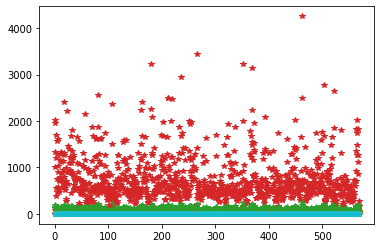

In [14]:
plt.plot(X_train,'*')
plt.show()

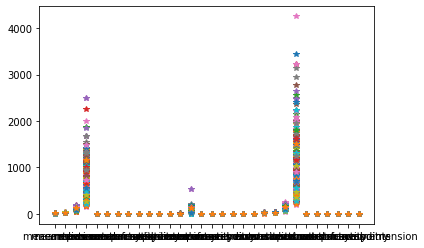

In [15]:
plt.plot(X_train.T,'*')
plt.show()

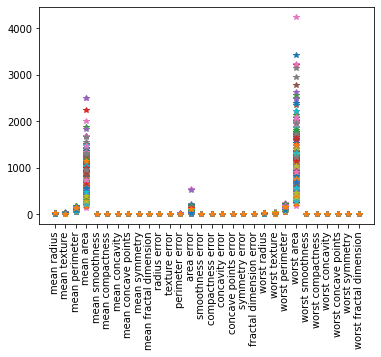

In [16]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [17]:
X_binarised_train = X_train['mean area'].map(lambda x : 0 if x < 1000 else 1)

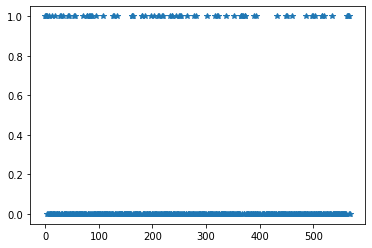

In [18]:
plt.plot(X_binarised_train,'*')
plt.show()

In [19]:
#X_binarised_train = X_train.apply(pd.cut,bins = 2, labels=[0,1])
#X_binarised_test = X_test.apply(pd.cut,bins = 2, labels=[0,1])

In [20]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels=[1,0])
X_binarised_test = X_test.apply(pd.cut,bins = 2, labels=[1,0])

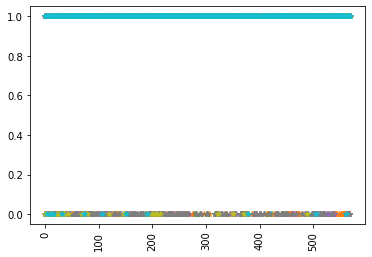

In [21]:
plt.plot(X_binarised_train,'*')
plt.xticks(rotation='vertical')
plt.show()

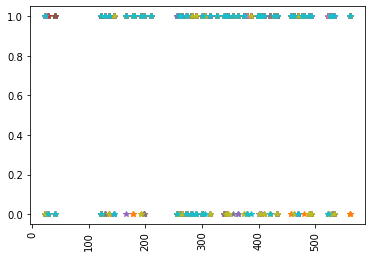

In [22]:
plt.plot(X_binarised_test,'*')
plt.xticks(rotation='vertical')
plt.show()

In [23]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [25]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#**Inference and Search**

In [26]:
b = 3
i = 100 
if(np.sum(X_binarised_train[100,:])>=b):
  print("MP nuron inference is Malignant")
else:
   print("MP nuron inference is Benign")

if(Y_train[i]==1):
  print("Ground Truth is Malignant")
else:
  print("Ground Truth is Benign")

MP nuron inference is Malignant
Ground Truth is Benign


In [27]:
b = 3
i = np.random.randint(0,X_binarised_train.shape[0])

print("For row i : ",i)

if(np.sum(X_binarised_train[100,:])>=b):
  print("MP nuron inference is Malignant")
else:
   print("MP nuron inference is Benign")

if(Y_train[i]==1):
  print("Ground Truth is Malignant")
else:
  print("Ground Truth is Benign")

For row i :  66
MP nuron inference is Malignant
Ground Truth is Malignant


In [28]:
b = 3
y_pred_train = []
accurate_rows = 0
for x, y in zip(X_binarised_train,Y_train):
  y_pred = np.sum(x)>=b
  y_pred_train.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_train.shape[0])

Accuracy is :  0.626953125


In [29]:
for b in range(X_binarised_train.shape[1]+1):
  y_pred_train = []
  accurate_rows = 0
  for x, y in zip(X_binarised_train,Y_train):
    y_pred = np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows += (y_pred == y) 
  print("b = ",b," Accuracy is : ", accurate_rows/X_binarised_train.shape[0])

b =  0  Accuracy is :  0.626953125
b =  1  Accuracy is :  0.626953125
b =  2  Accuracy is :  0.626953125
b =  3  Accuracy is :  0.626953125
b =  4  Accuracy is :  0.626953125
b =  5  Accuracy is :  0.626953125
b =  6  Accuracy is :  0.626953125
b =  7  Accuracy is :  0.626953125
b =  8  Accuracy is :  0.626953125
b =  9  Accuracy is :  0.626953125
b =  10  Accuracy is :  0.626953125
b =  11  Accuracy is :  0.626953125
b =  12  Accuracy is :  0.626953125
b =  13  Accuracy is :  0.626953125
b =  14  Accuracy is :  0.630859375
b =  15  Accuracy is :  0.6328125
b =  16  Accuracy is :  0.642578125
b =  17  Accuracy is :  0.6484375
b =  18  Accuracy is :  0.65625
b =  19  Accuracy is :  0.6640625
b =  20  Accuracy is :  0.671875
b =  21  Accuracy is :  0.6875
b =  22  Accuracy is :  0.701171875
b =  23  Accuracy is :  0.724609375
b =  24  Accuracy is :  0.755859375
b =  25  Accuracy is :  0.78515625
b =  26  Accuracy is :  0.818359375
b =  27  Accuracy is :  0.845703125
b =  28  Accuracy is 

In [30]:
b = 28
y_pred_test = []
accurate_rows = 0
for x, y in zip(X_binarised_test,Y_test):
  y_pred = np.sum(x)>=b
  y_pred_test.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_test.shape[0])

Accuracy is :  0.7894736842105263


#**MP Neuron Class**

In [31]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])


In [32]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 28
Highest accuracy is 0.849609375


In [33]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)
print(accuracy_test)

0.7894736842105263
